In [1]:
from pylab import *
import numpy as np
from scipy import integrate
from matplotlib import pyplot

## Dark Matter distribution and parameters

For the calculation of the net flux of gamma rays produced by the decay of the DM, the J factors consider the NFW and Einasto profiles. In these, the parameters were adjusted to normalize the value of the density profile to 8 $[kpc]$.  

In [4]:
##Defino parámetros, extraídos de [Arxiv:1202.5242]

n = 5.88
rs = 20000                                  ## escalador de radio
dn = 2 * n

##Densidades crítica y normalizada para rs. 

                                      
rho_c_gev =  0.35                         ## Gev/cm^3
rho_s_gev = 0.0875                        ## Gev/cm^3


#Distribuciones para el halo de materia oscura

def NFW(x):
    y = (rho_c_gev) /((x/rs) * (1+(x/rs))**2)
    return y

def EIN(x):
    y = rho_s_gev * np.exp(-dn * (((x/rs)**(1/n))-1))
    return y



  


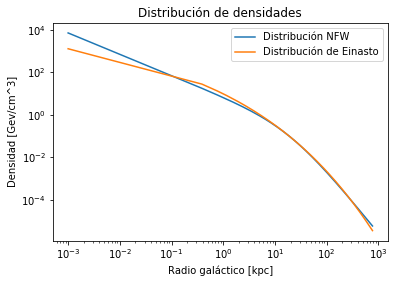

<Figure size 720x14400 with 0 Axes>

In [4]:
# array de valores a representar
x = linspace(1, 70000, 2000)
fig, ax = pyplot.subplots()
p1, p2= pyplot.plot((x/1000), NFW(x), (x/1000), EIN(x))
pyplot.yscale('log') 
pyplot.xscale('log') 

# Añado leyenda, tamaño de letra 10, en esquina superior derecha
legend(('Distribución NFW', 'Distribución de Einasto'),
prop = {'size': 10}, loc='upper right')

xlabel('Radio galáctico [kpc]')
ylabel('Densidad [Gev/cm^3]')
title('Distribución de densidades')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(10, 200))

pyplot.show()

## J factor decay

The expression for the J factor for Einasto and NFW profiles in the l.o.s. in the Milky Way is:



$J_f(\psi)=\int_{l.o.s.} \rho_{NFW}(r) dl=\int_{l.o.s.} dl  \frac{\rho_{sun} }{(\frac{\sqrt{r_o^2+l^2-2r_o\cdot l cos(\psi)}}{r_s})\cdot (1+(\frac{\sqrt{r_o^2+l^2-2r_o\cdot l cos(\psi)}}{r_s}))^2}$


$J_f=\int_{l.o.s.} \rho_{EIN}(r) dl=\int_{l.o.s.} dl \: \rho_{sun} \cdot e^{-2\cdot n((\frac{\sqrt{r_o^2+l^2-2r_o\cdot l cos(\psi)}}{r_s})^{\frac{1}{n}}-1)}$




In [3]:
#Parametrización

cm = 3.0856*10**18    #pc a cm


#Lista para los factores J asociado a las distribuciones
degree_list = []
Jf_list_NFW=[]
Jf_list_EIN=[]
list=np.linspace(0, pi, 150)

#Genero lista de valores de JfN para un radio de observación r fijo 

for z in list:
    degree = np.degrees(z)
    degree_list.append(degree)
    
    def NFW1(x):
        y = (rho_c_gev) /(((np.sqrt((8000)**2+(x)**2-16000*x*cos(z)))/(rs)) * (1+((np.sqrt((8000)**2+(x)**2-16000*x*cos(z)))/(rs)))**2)
        return y
    JfN_NFW = integrate.quad(NFW1, 0, 7999)[0] 
    Jf_list_NFW.append(JfN_NFW*cm)
    
    def EIN1(x):
        y = rho_s_gev * np.exp(-dn * ((((np.sqrt((8000)**2+(x)**2-16000*x*cos(z)))/(rs))**(1/n))-1))
        return y
    JfN_EIN = integrate.quad(EIN1, 0, 7999)[0] 
    Jf_list_EIN.append(JfN_EIN*cm)


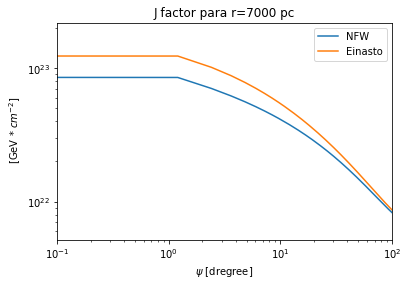

<Figure size 720x14400 with 0 Axes>

In [4]:
fig, ax = plt.subplots()

p1, p2= plot(degree_list, Jf_list_NFW, degree_list, Jf_list_EIN)

pyplot.yscale('log')
pyplot.xscale('log')
xlim(0.1, 100)
# Añado leyenda, tamaño de letra 10, en esquina superior derecha
legend(('NFW', 'Einasto'),
prop = {'size': 10}, loc='upper right')

xlabel('$\psi$ [dregree]')
ylabel(' [GeV * $cm^{-2}$]')
title('J factor para r=7000 pc')




# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(10, 200))



show()

# J factor normalizado

In [7]:
#Lista para los factores J asociado a las distribuciones

Jf_list_NFW=[]
Jf_list_EIN=[]
list=np.linspace(0, pi, 150)

#Genero lista de valores de JfN para un radio de observación r fijo 

for z in list:
    
    def NFW1(x):
        y = (rho_c_gev) /(((np.sqrt(8000**2+x**2-16000*x*cos(z)))/rs) * (1+((np.sqrt(8000**2+x**2-16000*x*cos(z)))/rs))**2)
        return y
    JfN_NFW = integrate.quad(NFW1, 0, 7999)[0]/(8000*NFW(8000))
    Jf_list_NFW.append(JfN_NFW)
    
    def EIN1(x):
        y = rho_s_gev * np.exp(-dn * ((((np.sqrt(8000**2+x**2-16000*x*cos(z)))/rs)**(1/n))-1))
        return y
    JfN_EIN = integrate.quad(EIN1, 0, 7999)[0]/(8000*EIN(8000))
    Jf_list_EIN.append(JfN_EIN)

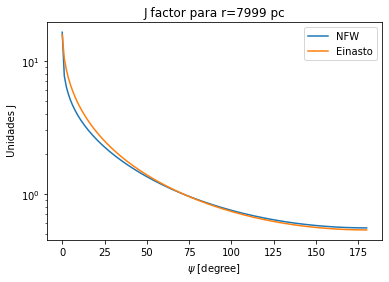

<Figure size 720x14400 with 0 Axes>

In [9]:
fig, ax = plt.subplots()

p1, p2= plot(degree_list, Jf_list_NFW, degree_list, Jf_list_EIN)

pyplot.yscale('log')
#pyplot.xscale('log')
# Añado leyenda, tamaño de letra 10, en esquina superior derecha
legend(('NFW', 'Einasto'),
prop = {'size': 10}, loc='upper right')
#xlim(0.01, 100)
xlabel('$\psi$ [degree]')
ylabel(' Unidades J')
title('J factor para r=7999 pc')


# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(10, 200))



show()

# Decay flux

For the study of event detection in CTA, we consider a gamma-ray production flow of  DM decay, given by

$ \frac{d \phi_{dec}}{d E}=\frac{\lambda}{4 \pi m_{\chi}} \frac{d N_{\gamma}}{d E} \int_{\triangle \Omega} d\Omega J_{factor}$


Where $\frac{d N_{\gamma}}{d E}$ is the number of photon per decay per energy equal to $Z\cdot \delta (E-E')$. In this study we consider a DM decay in one photon and one neutrino particle. In this case we can assume $Z \approx 1$.

The parameter that defines the properties of the detection in CTA is $ A_ {eff} $, which considers the temporal exposure of the detector, the efficiency of energy reconstruction, the interaction of the photon particle in the atmosphere and others. The expression is given by

$ A_{eff}(E_{in}, E_{rec})= (M_{CTA}\cdot N_{Av})\sigma(\gamma p\rightarrow \chi) \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-(E_{inc}-E_{rec})^2/2\sigma^2}= A_{eff}(E_{inc}) \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-(E_{inc}-E_{rec})^2/2\sigma^2} $ 


The value of $A_{eff}(E_{inc})$ can be obtained from the paper "Monte Carlo design studies for the CTA" (arXiv:1210.3503), for a DM mass in the order of 1 [TeV]. 

Finally, the total number of DM particles decay detected in CTA is given by

$N_{dec}=\frac{t_{obs}}{4\pi m_{\chi} \tau_{chi}} \int_{\triangle E_{rec}} A_{eff}(E_{inc}) \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-(E_{inc}-E_{rec})^2/2\sigma^2} \int_{\triangle \Omega} d\Omega J_{factor}$


# Número de detecciones de CR

The number of photon event produced by cosmic ray in CTA is given by

$N_{CR}=t_{obs}\cdot \int_{0}^{\infty}dE_{inc} \int_{\triangle E_{rec}} dE_{rec} A_{eff}(E_{inc}) \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-(E_{inc}-E_{rec})^2/2\sigma^2} \int_{\triangle \Omega} d\Omega \frac{d\phi_{CR}}{dE_{inc}d\Omega}$


Where $\frac{d\phi_{CR}}{dE_{inc}d\Omega}$ it's assume equal to $ 1.5 \cdot 10^{-11} \cdot (\frac{E}{1 [TeV]})^{-3} [GeV]^{-1} [cm]^{-2} [s]^{-1} [sr]^{-1}$ 

In [5]:
#Parámetros

t_obs= 200 * 60 * 60    # en segundos
A_eff0= 10**10         # área efectiva para DM-mass=1 [TeV], en cm^2
#A_eff0= 1.5*10**10         # área efectiva para DM-mass=2 [TeV], en cm^2
#A_eff0= 2*10**10         # área efectiva para DM-mass=3 [TeV], en cm^2
cm = 3.086 * 10**18     # Conversión de pc a cm
c=1                     # velocidad de la luz
test=float("inf")



#Target de observación (Andrómeda). Datos extraidos de arxiv: 1011.3786
R_sol = 8000
D_target = 770000
theta1 = 0
theta2 = 0.105*pi/180
lf = D_target


#Target de observación (Centro galáctico). Datos extraidos de arxiv: 1401.7330

#D_target = 7000
#theta1 = 0
#theta2 = 0.14*pi/180
#lf = D_target



#Integrales de observación por perfil

NFW = lambda y, x: (rho_c_gev*sin(y)) /(((np.sqrt((D_target)**2+(x)**2-2*(D_target)*(x)*cos(y)))/rs) * (1+((np.sqrt((D_target)**2+(x)**2-2*(D_target)*(x)*cos(y)))/rs))**2)
#NFW = lambda y, x: (rho_c_gev*sin(y)) /(((np.sqrt((R_sol)**2+(x)**2-2*(R_sol)*(x)*cos(y)))/rs) * (1+((np.sqrt((R_sol)**2+(x)**2-2*(D_target)*(x)*cos(y)))/rs))**2)

J_Omega_NFW = 2*pi*cm * integrate.dblquad(NFW, 0, lf, lambda x: theta1, lambda x: theta2)[0]

EIN = lambda y, x: (rho_s_gev) * sin(y) * np.exp(-dn * ((((np.sqrt((D_target)**2+(x)**2-2*(D_target)*(x)*cos(y)))/(rs))**(1/n))-1))
#EIN = lambda y, x: (rho_s_gev) * sin(y) * np.exp(-dn * ((((np.sqrt((R_sol)**2+(x)**2-2*(R_sol)*(x)*cos(y)))/(rs))**(1/n))-1))

J_Omega_EIN = 2*pi*cm * integrate.dblquad(EIN, 0, lf, lambda x: theta1, lambda x: theta2)[0]

# Masas y tiempos de vida media para DM. Datos extraídos de fig.5 de Arxiv. 1401.7330

m_chi_0 = 10**3      #[GeV]
tau_chi0_N = 10**28   #[s]
tau_chi0_E = 1.3*10**27   #[s]

#m_chi_0 = 2*10**3      #[GeV]
#tau_chi0_N = 2*10**27   #[s]
#tau_chi0_E = 3*10**27   #[s]


#m_chi_0 = 3*10**3      #[GeV]
#tau_chi0 = 4*10**27   #[s]
#tau_chi0_E = 5*10**27   #[s]



# integrales

E_inc=m_chi_0*c**2/2
sigma= 0.1*E_inc

def flux(x):
    #z =A_eff0*(1/(np.sqrt(2*pi*sigma**2)))*np.exp(-((y - x)**2/(2*sigma**2)))*1.5*10**(-2)*x**(-3)
    z =A_eff0*1.5*10**(-2)*x**(-3)
    return z


def Omega(x):
    y=sin(x)
    return y

def Aeff(x):
    y = A_eff0*(1/(np.sqrt(2*pi*sigma**2)))*np.exp(-(x - E_inc)**2/(2*sigma**2))
    return y



#Bins
n = 100
delta_E = np.log10(30)/n
E = 100 # [Gev] 

##Iteración para detecciones de DM y CR

E_list=[]
N_list_NFW=[]
N_list_EIN=[]
N_CR_list=[]
N_Tot_list_NFW=[]
N_Tot_list_EIN=[]


list_E=np.linspace(0, n-1, n)

for e in list_E:
    
    Ei = E * 10**(e*delta_E)
    Ef = E * 10**((e+1)*delta_E)
    e_list=Ef-Ei
    E_list.append(Ef)
    N_rec_NFW = (t_obs/(4*pi*m_chi_0*tau_chi0_N)) * integrate.quad(Aeff, Ei, Ef)[0] * J_Omega_NFW
    N_rec_EIN = (t_obs/(4*pi*m_chi_0*tau_chi0_E)) * integrate.quad(Aeff, Ei, Ef)[0] * J_Omega_EIN
    N_list_NFW.append(N_rec_NFW+10**(-3))
    N_list_EIN.append(N_rec_EIN+10**(-3))
    N_CR= t_obs*2*pi*integrate.quad(flux, Ei, Ef)[0]*integrate.quad(Omega, theta1, theta2)[0]
    N_CR_list.append(N_CR)




# Gráficas por bins para $N_{DM}$

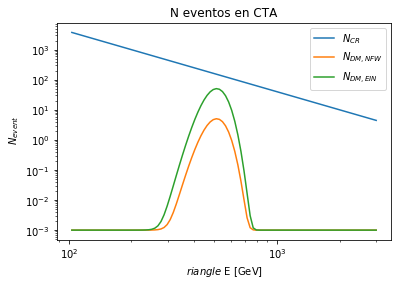

<Figure size 720x14400 with 0 Axes>

In [4]:
fig, ax = plt.subplots()

#p1, p2, p3=plot(E_list, N_list_NFW, E_list, N_list_EIN, E_list, N_CR_list)

p1, p2, p3=plot(E_list, N_CR_list, E_list, N_list_NFW, E_list, N_list_EIN)

pyplot.yscale('log')
pyplot.xscale('log')
# Añado leyenda, tamaño de letra 10, en esquina superior derecha
legend(('$N_{CR}$', '$N_{DM, NFW}$', '$N_{DM, EIN}$'),
prop = {'size': 10}, loc='upper right')
#ylim(0, 1000)
#xlim(200, 700)
xlabel('$\triangle$ E [GeV]')
ylabel(' $N_{event}$')
title('N eventos en CTA')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(10, 200))



show()


In [30]:
Ei=250
Ef=750

N_rec_NFW2 = (t_obs/(4*pi*m_chi_0*tau_chi0_N)) * integrate.quad(Aeff, Ei, Ef)[0] * J_Omega_NFW
N_rec_EIN2 = (t_obs/(4*pi*m_chi_0*tau_chi0_N)) * integrate.quad(Aeff, Ei, Ef)[0] * J_Omega_EIN
N_CR2= t_obs*2*pi*integrate.quad(flux, Ei, Ef)[0]*integrate.quad(Omega, theta1, theta2)[0]

print(N_rec_NFW2, N_rec_EIN2, 2*np.sqrt(N_CR2))

37.2836905259105 92.26342117552286 180.03301221011242


# Sensitivity

Following [arxiv:1011.3786] for constrain the model of DM decay assumed in this investigation, the parameter $\tau$ and $m_{\chi}$ are related by a maximized number of event detected given by:



$ N_{DM} = 2 \cdot \sqrt{N_{CR}}$

In [17]:
tau_list=[]
t0=10**26
tN=10**29
N=20
delta=np.log10(tN/t0)/N


for t in range(N+1):
    ti=t0*10**(t*delta)
    tau_list.append(ti)

mass_list=[]
m0=500
mN=10**4
N=20
deltam=np.log10(mN/m0)/N


for t in range(N+1):
    mi=m0*10**(t*deltam)
    mass_list.append(mi)    
    
    
    

Sen=np.zeros(((N+1)**2, 5))
m=0


Mass_tau_up_nfw=[]
Mass_tau_down_nfw=[]
    


for m_chi_0 in mass_list:
    
    for tau_chi0_N in tau_list:
        
        Ei=(m_chi_0/2)-50
        Ef=(m_chi_0/2)+50
        
        def Aeff(x):
            y = A_eff0*(1/(np.sqrt(2*pi*sigma**2)))*np.exp(-(x - (m_chi_0/2))**2/(2*sigma**2))
            return y
        
       
        N_rec_NFW2 = (t_obs/(4*pi*m_chi_0*tau_chi0_N)) * integrate.quad(Aeff, Ei, Ef)[0] * J_Omega_NFW
        N_rec_EIN2 = (t_obs/(4*pi*m_chi_0*tau_chi0_N)) * integrate.quad(Aeff, Ei, Ef)[0] * J_Omega_EIN
        N_CR2= t_obs*2*pi*integrate.quad(flux, Ei, Ef)[0]*integrate.quad(Omega, theta1, theta2)[0]
        
        Sen[m,0]=m_chi_0
        Sen[m,1]=tau_chi0_N
        Sen[m,2]=N_rec_NFW2
        Sen[m,3]=N_rec_EIN2
        Sen[m,4]=N_CR2
        Sen_factor=np.sqrt(Sen[m,4])
        print(Sen[m,:]) 
        
        if  Sen[m,2] < 2*Sen_factor :
            
            Mass_tau_down_nfw.append([Sen[m,0],Sen[m,1]])
            
            
          
        else: Mass_tau_up_nfw.append([Sen[m,0],Sen[m,1]])
            
        m=m+1
        
        


[5.00000000e+02 1.00000000e+26 5.09063967e+03 6.63538974e+03
 7.91305798e+03]
[5.00000000e+02 1.41253754e+26 3.60389689e+03 4.69749620e+03
 7.91305798e+03]
[5.00000000e+02 1.99526231e+26 2.55136361e+03 3.32557263e+03
 7.91305798e+03]
[5.00000000e+02 2.81838293e+26 1.80622711e+03 2.35432512e+03
 7.91305798e+03]
[5.00000000e+02 3.98107171e+26 1.27871087e+03 1.66673455e+03
 7.91305798e+03]
[5.00000000e+02 5.62341325e+26 9.05257971e+02 1.17995770e+03
 7.91305798e+03]
[5.00000000e+02 7.94328235e+26 6.40873564e+02 8.35346076e+02
 7.91305798e+03]
[5.00000000e+02 1.12201845e+27 4.53703738e+02 5.91379733e+02
 7.91305798e+03]
[5.00000000e+02 1.58489319e+27 3.21197649e+02 4.18664789e+02
 7.91305798e+03]
[5.00000000e+02 2.23872114e+27 2.27390521e+02 2.96391973e+02
 7.91305798e+03]
[5.00000000e+02 3.16227766e+27 1.60980161e+02 2.09829447e+02
 7.91305798e+03]
[5.00000000e+02 4.46683592e+27 1.13965226e+02 1.48547873e+02
 7.91305798e+03]
[5.00000000e+02 6.30957344e+27 8.06812016e+01 1.05163840e+02
 7.

 4.98582215e+02]
[1.22822803e+03 1.77827941e+28 1.16536872e+01 1.51899883e+01
 4.98582215e+02]
[1.22822803e+03 2.51188643e+28 8.25017876e+00 1.07536882e+01
 4.98582215e+02]
[1.22822803e+03 3.54813389e+28 5.84067927e+00 7.61302820e+00
 4.98582215e+02]
[1.22822803e+03 5.01187234e+28 4.13488427e+00 5.38961122e+00
 4.98582215e+02]
[1.22822803e+03 7.07945784e+28 2.92727389e+00 3.81555254e+00
 4.98582215e+02]
[1.22822803e+03 1.00000000e+29 2.07235121e+00 2.70120434e+00
 4.98582215e+02]
[1.42669291e+03 1.00000000e+26 1.78406987e+03 2.32544428e+03
 3.17017427e+02]
[1.42669291e+03 1.41253754e+26 1.26302474e+03 1.64628848e+03
 3.17017427e+02]
[1.42669291e+03 1.99526231e+26 8.94153043e+02 1.16548299e+03
 3.17017427e+02]
[1.42669291e+03 2.81838293e+26 6.33011877e+02 8.25098768e+02
 3.17017427e+02]
[1.42669291e+03 3.98107171e+26 4.48138090e+02 5.84125194e+02
 3.17017427e+02]
[1.42669291e+03 5.62341325e+26 3.17257472e+02 4.13528969e+02
 3.17017427e+02]
[1.42669291e+03 7.94328235e+26 2.24601090e+02 2

[3.01708817e+03 5.01187234e+28 1.68327224e+00 2.19405970e+00
 3.32650012e+01]
[3.01708817e+03 7.07945784e+28 1.19166548e+00 1.55327531e+00
 3.32650012e+01]
[3.01708817e+03 1.00000000e+29 8.43634555e-01 1.09963471e+00
 3.32650012e+01]
[3.50460843e+03 1.00000000e+26 7.26277952e+02 9.46666350e+02
 2.12122042e+01]
[3.50460843e+03 1.41253754e+26 5.14165414e+02 6.70188451e+02
 2.12122042e+01]
[3.50460843e+03 1.99526231e+26 3.64001238e+02 4.74457089e+02
 2.12122042e+01]
[3.50460843e+03 2.81838293e+26 2.57693142e+02 3.35889896e+02
 2.12122042e+01]
[3.50460843e+03 3.98107171e+26 1.82432773e+02 2.37791836e+02
 2.12122042e+01]
[3.50460843e+03 5.62341325e+26 1.29152513e+02 1.68343728e+02
 2.12122042e+01]
[3.50460843e+03 7.94328235e+26 9.14329770e+01 1.19178232e+02
 2.12122042e+01]
[3.50460843e+03 1.12201845e+27 6.47295906e+01 8.43717272e+01
 2.12122042e+01]
[3.50460843e+03 1.58489319e+27 4.58250408e+01 5.97306086e+01
 2.12122042e+01]
[3.50460843e+03 2.23872114e+27 3.24416444e+01 4.22860326e+01
 2.

 2.24008229e+00]
[7.41134449e+03 6.30957344e+27 5.44308807e+00 7.09478830e+00
 2.24008229e+00]
[7.41134449e+03 8.91250938e+27 3.85341125e+00 5.02272547e+00
 2.24008229e+00]
[7.41134449e+03 1.25892541e+28 2.72800625e+00 3.55581732e+00
 2.24008229e+00]
[7.41134449e+03 1.77827941e+28 1.93128053e+00 2.51732588e+00
 2.24008229e+00]
[7.41134449e+03 2.51188643e+28 1.36724191e+00 1.78213025e+00
 2.24008229e+00]
[7.41134449e+03 3.54813389e+28 9.67933144e-01 1.26165159e+00
 2.24008229e+00]
[7.41134449e+03 5.01187234e+28 6.85244189e-01 8.93180928e-01
 2.24008229e+00]
[7.41134449e+03 7.07945784e+28 4.85115735e-01 6.32323673e-01
 2.24008229e+00]
[7.41134449e+03 1.00000000e+29 3.43435639e-01 4.47650878e-01
 2.24008229e+00]
[8.60891659e+03 1.00000000e+26 2.95660877e+02 3.85378907e+02
 1.42911945e+00]
[8.60891659e+03 1.41253754e+26 2.09311872e+02 2.72827373e+02
 1.42911945e+00]
[8.60891659e+03 1.99526231e+26 1.48181457e+02 1.93146989e+02
 1.42911945e+00]
[8.60891659e+03 2.81838293e+26 1.04904438e+02 1

In [18]:
nm=np.array(Mass_tau_up_nfw)
nm2=np.array(Mass_tau_down_nfw)

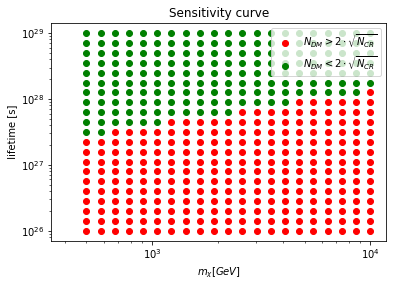

<Figure size 720x14400 with 0 Axes>

In [33]:

pyplot.scatter(nm[:,0], nm[:,1], color ='red')
pyplot.scatter(nm2[:,0], nm2[:,1], color ='green')

# Añado leyenda, tamaño de letra 10, en esquina superior derecha
pyplot.legend(('$N_{DM}>2 \cdot \sqrt{N_{CR}}$','$N_{DM}<2 \cdot \sqrt{N_{CR}}$'),prop = {'size': 10}, loc='upper right')
#pyplot.ylim((10**(26), 10**(29)))
#xlim(200, 700)
pyplot.xlabel('$ m_{\chi} [GeV] $')
pyplot.ylabel(' lifetime [s] ')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.title('Sensitivity curve')

# Creo una figura (ventana), pero indico el tamaño (x,y) en pulgadas
figure(figsize=(10, 200))



show()


In [49]:
mass_nfw_list=[]
mass_ein_list=[]
tau_ein_list=[]
tau_nfw_list=[]

for n in range(len(index_list_NFW)-1):
    
    if index_list_NFW[n]+1 == index_list_NFW[n+1]:
        mass_nfw=Sen[n+1,0]
        mass_nfw_list.append(mass_nfw)
        tau_nfw=Sen[n+1,1]
        tau_nfw_list.append(tau_nfw)
        n=n+2
        
    else: 
        mass_nfw=Sen[n,0]
        mass_nfw_list.append(mass_nfw)
        tau_nfw=Sen[n,1]
        tau_nfw_list.append(tau_nfw)
        n=n+1
   

for n in range(len(index_list_EIN)-1):
    
    if index_list_EIN[n]+1 == index_list_EIN[n+1]:
        mass_ein=Sen[n+1,0]
        mass_ein_list.append(mass_ein)
        tau_ein=Sen[n+1,1]
        tau_ein_list.append(tau_ein)
        n=n+2
        
    else: 
        mass_ein=Sen[n,0]
        mass_ein_list.append(mass_ein)
        tau_ein=Sen[n,1]
        tau_ein_list.append(tau_ein)
        n=n+1          
    
    

In [2]:
tau_nfw_list

NameError: name 'tau_nfw_list' is not defined